# Relation Extraction NLP - Overview + Implementation
* Notebook by Adam Lang
* Date: 3/28/2024
* This notebook will go over the basics of Relation Extraction techniques in NLP and demonstrate implementations in Python.

# What is Relation Extraction?
* Process of extracting relational triples from natural language text.
* Relational triples are the relation between a few entities.
* These are usually extracted as tuples.
* Examples:
    * (`USA`, `President`, `Donald Trump`)
    * (`Russia`, `President`, `Vladimir Putin`)
    * `John Doe was born in England. John is working as a Data Scientiest. John also founded ABC Inc. and currently owns a Dodge Hellcat, which is a beautfiul car.`
        * Triples are as follows:
        1. (`John Doe`, `born in`, `England`)
        2. (`John`, `working`, `Data Scientist`)
        3. (`John`, `founded`, `ABC Inc.`)
        4. (`John`, `owns`, `Dodge Hellcat`)

# Types of Relation Extraction

1. Rule-based Relation Extraction
    * Uses hand-crafted patterns
    * Can be made according to particular domains
    * PRO: Very high precision!!
    * CONs: Requires significant manual labor, has low recall

2. Supervised Relation Extraction
    * Consider two entities E1 and E2
    * Task: Detect if a relation exists between E1 and E2
    * The task of extraction is converted into Relation Detection.
    * CONs: Needs a lot of labelled data, Expensive to label data!

3. Semi-Supervised Relation Extraction:
    * Used when we don't have enough labelled data
    * Starts with a set of seed tuples
    * Extract iterative relations from text => iterative process
    * Has a higher recall than the Rule-based Relation Extraction

4. Distantly Supervised Relation Extraction
    * Combines the idea of seed with relation detection
    * Uses a set of tuples from existing knowledge bases (e.g. wikipedia)
    * Checks if entities are present in a sentence
    * Extracts features and trains a classifier
    * PROs: Allows to work with a large labelled dataset - uses large number of relations from knowledge bases.
    * CONs: Produces noisy annotation and restricted to the knowledge base trained on.

5. Unsupervised Relation Extraction
    * Also known as "Open Relation Extraction"
    * **No training data or pre-defined rules are required**
    * Extract new relations from the web



# Rule-based Relation Extraction - Implementation
* Utilizes a lot of hand-written patterns for extracting info from natural language text.
* Hearst, 1992. "Automatic Acquisition of Hyponyms from Large Text Corpora". Link to paper: https://aclanthology.org/C92-2082.pdf
    * Hearst built a set of text patterns that can be used for extracting meaningful information from text. These patterns are known as **Hearst Patterns.** These are **lexico-syntactic patterns** used to recognize hyponymy. For example:

    1. Avengers Endgame movie features many Marvel Heroes, such as Iron Man, Captain America, and Thor.
        * In this example, "Marvel Heroes" is a **hypernym** and "Iron Man", "Captain America", and "Thor" are **hyponyms**. We can formalize this pattern as:
            * "X such as Y", where X is the hypernym and Y is the hyponym.
            * Some other Hearst patterns are:

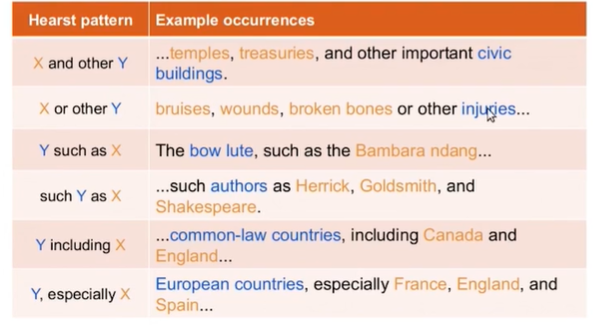


## Using Spacy's Matcher library

In [1]:
# import libraries
import spacy

from spacy.matcher import Matcher
from spacy import displacy

In [2]:
# load the spacy model
nlp = spacy.load("en_core_web_sm")

### Pattern 1: **X** such as **Y**

In [3]:
# define a string
text = "Developed countries such as USA have a better healthcare infrastructure compared to developing countries."

# create spacy object
doc = nlp(text)

In [4]:
# Print POS tag, and dependency tags
for token in doc:
  print(token.text, '=>', token.pos_,'=>', token.dep_)

Developed => ADJ => amod
countries => NOUN => nsubj
such => ADJ => amod
as => ADP => prep
USA => PROPN => pobj
have => VERB => ROOT
a => DET => det
better => ADJ => amod
healthcare => NOUN => compound
infrastructure => NOUN => dobj
compared => VERB => prep
to => ADP => prep
developing => VERB => amod
countries => NOUN => pobj
. => PUNCT => punct


#### Pattern: `NOUN + such + as + PROPN`

In [5]:
# define the pattern of interest
pattern = [{'POS': 'NOUN'},
           {'LOWER': 'such'},
           {'LOWER': 'as'},
           {'POS': 'PROPN'}]

spacy matcher docs: https://spacy.io/usage/rule-based-matching

In [6]:
# create matcher object
matcher = Matcher(nlp.vocab)

In [7]:
# Add the rule to matcher obect
matcher.add("Pattern X such as Y", [pattern])

In [8]:
# Run pattern on text
matches = matcher(doc)

In [9]:
# print matches
matches

[(17711623125337077988, 1, 5)]

summary of output:
* list of tuples
* first value is a hash value
* Second and third values are the start and end of the matched values.

We now need to extract the matched values.

In [10]:
# extract matched string
span = doc[matches[0][1]:matches[0][2]]
print(span)

countries such as USA


Summary of output:
* "countries" is the hypernym
* "USA" is the hyponym

In [11]:
# define another string
text = "I love eating healthy fruits such as Apple. I like supercars such as Lamborghini."

# create doc object
doc = nlp(text)

In [12]:
# run pattern on text
matches = matcher(doc)

In [13]:
# print extracted text
for match in matches:
  print(doc[match[1]:match[2]])

fruits such as Apple
supercars such as Lamborghini


Summary of output:
* We have extracted a hearst pattern such that the first word index is the hypernym and the last word indexed is the hyponym.

### Pattern 2: **X** and/or other **Y**

In [14]:
# define the string and create doc object
doc = nlp("In this way you can disinfect your car and other vehicles.")

In [15]:
# print POS tag, and dependency tags
for token in doc:
  print(token.text, '=>', token.pos_, '=>', token.dep_)

In => ADP => prep
this => DET => det
way => NOUN => pobj
you => PRON => nsubj
can => AUX => aux
disinfect => VERB => ROOT
your => PRON => poss
car => NOUN => dobj
and => CCONJ => cc
other => ADJ => amod
vehicles => NOUN => conj
. => PUNCT => punct


#### Pattern: `NOUN + and + other + NOUN`

In [16]:
# define the pattern
pattern = [{'POS':'NOUN'},
           {'LOWER':'and'},
           {'LOWER':'other'},
           {'POS':'NOUN'}]

In [18]:
# create matcher object
matcher = Matcher(nlp.vocab)

# add the rule to matcher
matcher.add("Pattern X and other Y", [pattern])

In [19]:
# running pattern on text
matches = matcher(doc)

# print extracted text
for match in matches:
  print(doc[match[1]:match[2]])

car and other vehicles


In [20]:
# define another string and create doc object
doc = nlp("Hereis how to keep your TV or other electronics clean.")

# running pattern on text
matches = matcher(doc)

# print extracted patterns
for match in matches:
  print(doc[match[1]:match[2]])

In [21]:
# print POS tag, and dependency tags
for token in doc:
  print(token.text,'=>',token.pos_,'=>',token.dep_)

Hereis => PROPN => ROOT
how => SCONJ => advmod
to => PART => aux
keep => VERB => relcl
your => PRON => poss
TV => NOUN => dobj
or => CCONJ => cc
other => ADJ => amod
electronics => NOUN => conj
clean => ADJ => oprd
. => PUNCT => punct


#### **Quantifiers**
* `!`  Negation
* `?`  Optional
* `+`  1 or more
* `-`  0 or more

Pattern: `NOUN + and/or + other + NOUN`

In [25]:
# define the pattern
pattern = [{'POS':'NOUN'},
           {'LOWER': 'and','OP':'?'},
           {'LOWER':'or','OP':'?'},
           {'LOWER':'other'},
           {'POS':'NOUN'}]

In [29]:
# create matcher object
matcher = Matcher(nlp.vocab)

# add rule to matcher
matcher.add("Pattern X and/or Y",[pattern])

In [30]:
# running pattern on text
matches = matcher(doc)

# print extracted text
for match in matches:
  print(doc[match[1]:match[2]])

TV or other electronics


#### Drawbacks:
* Hides implementation details.
* Doesn't work on patterns in which words do not immediately follow each other, e.g.
    * `Subject + Auxillary + Verb + ... + Object`

## Using Custom Functions for Relation Extraction

### Pattern 3: `X going Y`

In [35]:
# define the string and create doc object
text = "John is going to Berlin."
doc = nlp(text)

In [36]:
# visualizing dependency tree
displacy.render(doc, style='dep',jupyter=True)

observations:
* `going` is the ROOT word
* `John` is subject
* `Berlin` is object

In [41]:
## create a custom function for extracting relations
def x_going_y(doc):
  # proceed if at least 3 words are present -> subject, object, root
  if len(doc)>=3:
    matches=[]

    for i in range(len(doc)):
      x=''
      y=''

      # checking if the root word is going
      if ((doc[i].dep_ =='ROOT') and (doc[i].text == 'going')):
        # accessing subtree
        for token in doc[i].subtree:
          # checking if token is subect
          if token.dep_.startswith('nsubj'):
            x=token.text
          # checking if token is object
          if token.dep_.endswith('obj'):
            y=token.text
        # appending the triple into list
        matches.append((x,doc[i].text,y))
    return matches
  return []

In [42]:
# running function on text
x_going_y(doc)

[('John', 'going', 'Berlin')]

In [43]:
## sample on another piece of text
x_going_y(nlp("Sam was going on vacation to Vail. But, the plane was going to Steamboat."))

[('Sam', 'going', 'Vail'), ('plane', 'going', 'Steamboat')]

summary: spacy's matcher would not have been able to capture the specific relations thus using this custom function was useful.